In [162]:
library(ggplot2)
library(gridExtra)
library(grid)
library(scales)
library(dplyr)
library(glue)
library(stringr)
library(comprehenr)
library(purrr)
library(tibble)

Spiega perchè binomial

In [136]:
n   <- 75
y   <- 6

freq_prob <- y/n

mu  <- 0.15
std <- 0.14
alpha <- - mu * (std^2 + mu^2 - mu) / std^2
beta  <- (std^2 + mu^2 - mu)*(mu - 1) / std^2

#posterior is a Beta distribution but with the following alpha and beta values
alpha_post <- alpha + y
beta_post  <- beta + n - y

n_sample <- 200
p     <- seq(0,1, length.out=n_sample)
beta_distr <- dbeta(p, alpha_post, beta_post) #/ (sum(dbeta(p, alpha_post, beta_post)) / n_sample )

mu_post  <- alpha_post / (alpha_post + beta_post)
std_post <- sqrt((alpha_post*beta_post)/((alpha_post+beta_post)^2*(alpha_post+beta_post+1)))

In [137]:
cat("the frequentist estimator of the failure probability of the new method", freq_prob,"\n")

cat("alpha prior", alpha,"\n")
cat("beta prior", beta,"\n")
cat("alpha posterior", alpha_post,"\n")
cat("beta posterior", beta_post,"\n")
cat("beta posterior mean", mu_post,"\n")
cat("beta posterior std", std_post,"\n")


the frequentist estimator of the failure probability of the new method 0.08 
alpha prior 0.8257653 
beta prior 4.679337 
alpha posterior 6.825765 
beta posterior 73.67934 
beta posterior mean 0.08478674 
beta posterior std 0.03085551 


Warning message:
“Removed 120 row(s) containing missing values (geom_path).”
Warning message:
“Removed 120 row(s) containing missing values (geom_path).”


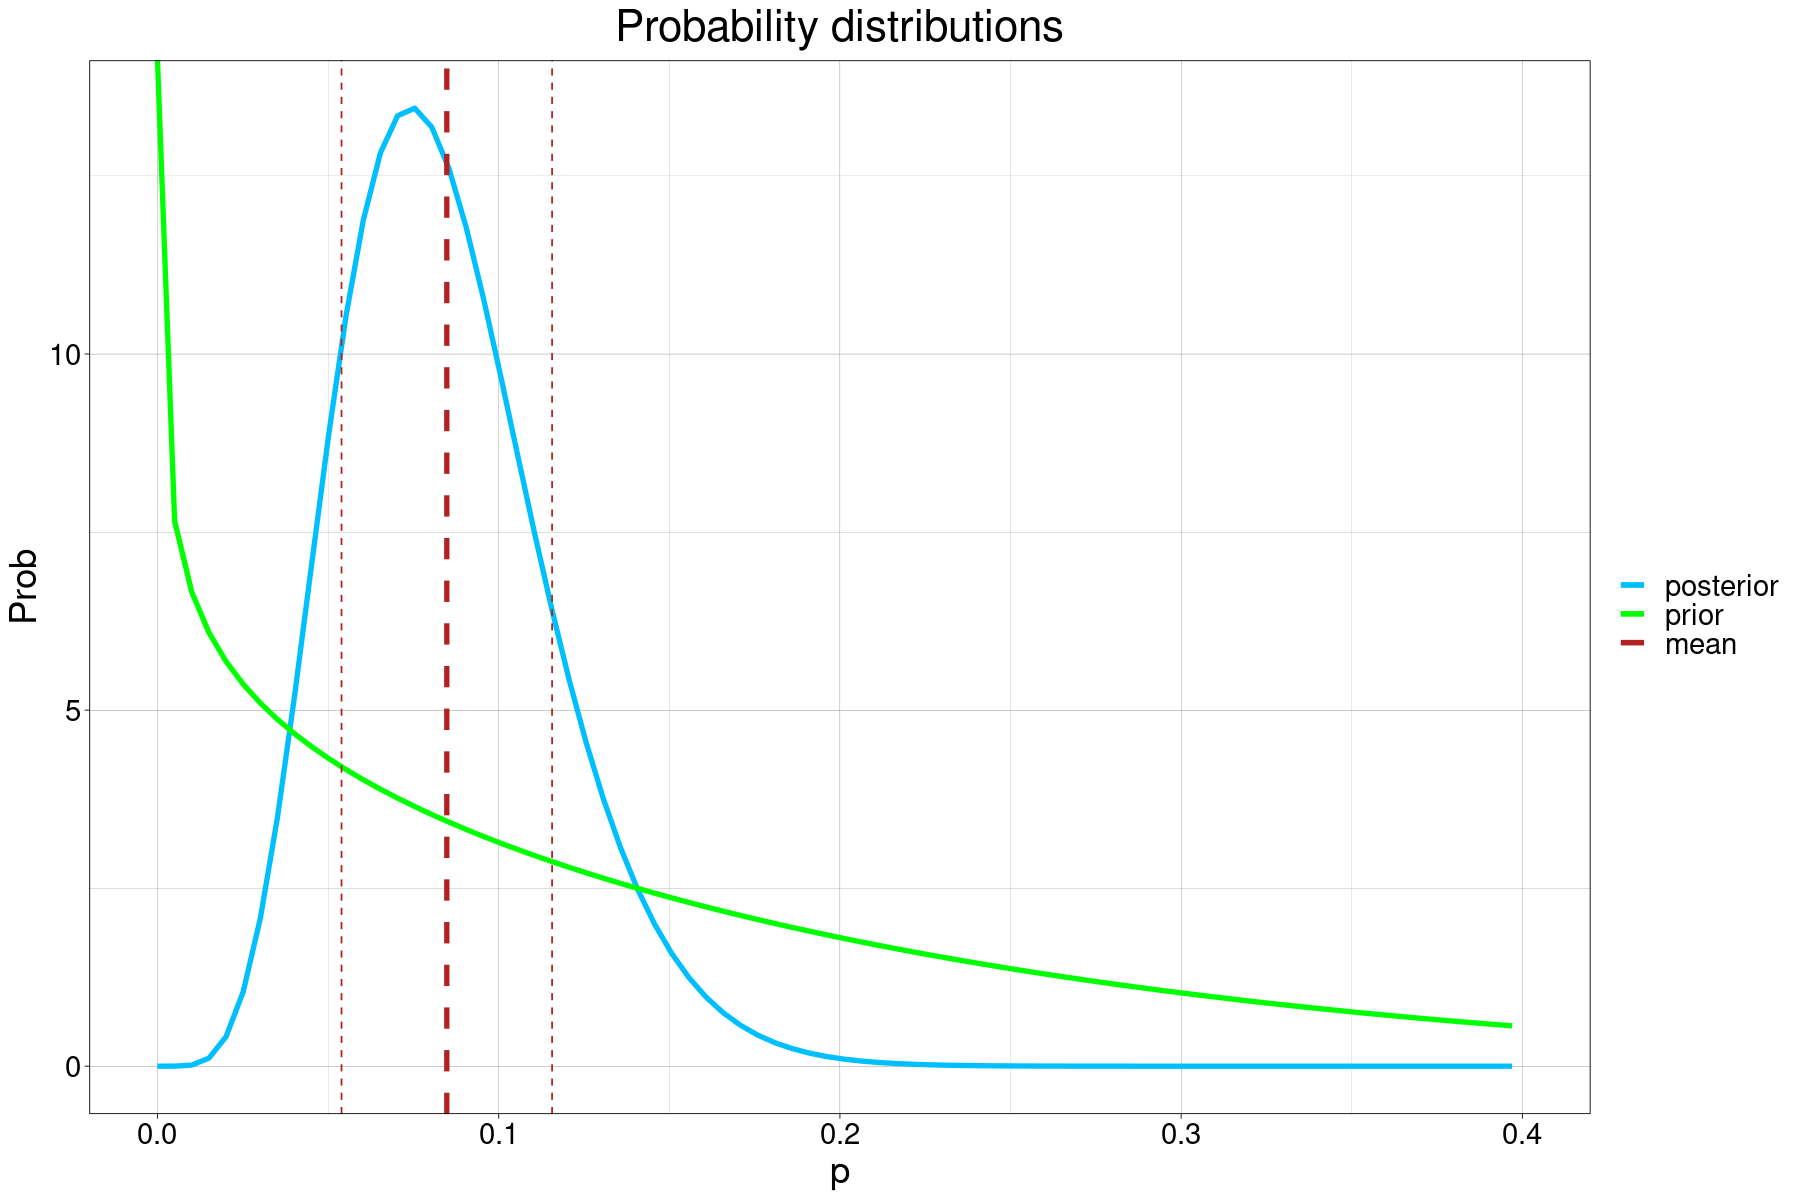

In [140]:
options(repr.plot.width=15, repr.plot.height=10)

plot <- ggplot() +
        geom_line(aes(x=p, y=beta_distr, color="posterior"),lwd=1.5) + 
        geom_line(aes(x=p, y=dbeta(p, alpha, beta), color="prior"),lwd=1.5) + 
        geom_vline(xintercept = mu_post, linetype="dashed", color="firebrick", lwd=1.5) +
        geom_vline(xintercept = (mu_post + std_post), linetype="dashed", color="firebrick") +
        geom_vline(xintercept = (mu_post - std_post), linetype="dashed", color="firebrick") +
        theme_linedraw() +
        xlim(0,0.4)+
        scale_color_manual(name = "", values = c("posterior" = "deepskyblue","prior"="green", "mean" = "firebrick" ))+
        labs(title=glue("Probability distributions"), x="p",y="Prob")+
        theme(text = element_text(size=22), plot.title = element_text( hjust = 0.5))
plot

### Bayesian

NULL hypotesis $ \text{H}_0$ is that $H_0 : p \geq p_0$ where $p_0 = 15$% \
we want to calculate the probability


In [197]:
p_0 <- 0.15 #15%
beta_low  <- qbeta(0.025, alpha_post, beta_post)
beta_high <- qbeta(0.975, alpha_post, beta_post)

beta_low
beta_high

[1] 0.03472224

[1] 0.1542349

Warning message:
“Removed 160 row(s) containing missing values (geom_path).”


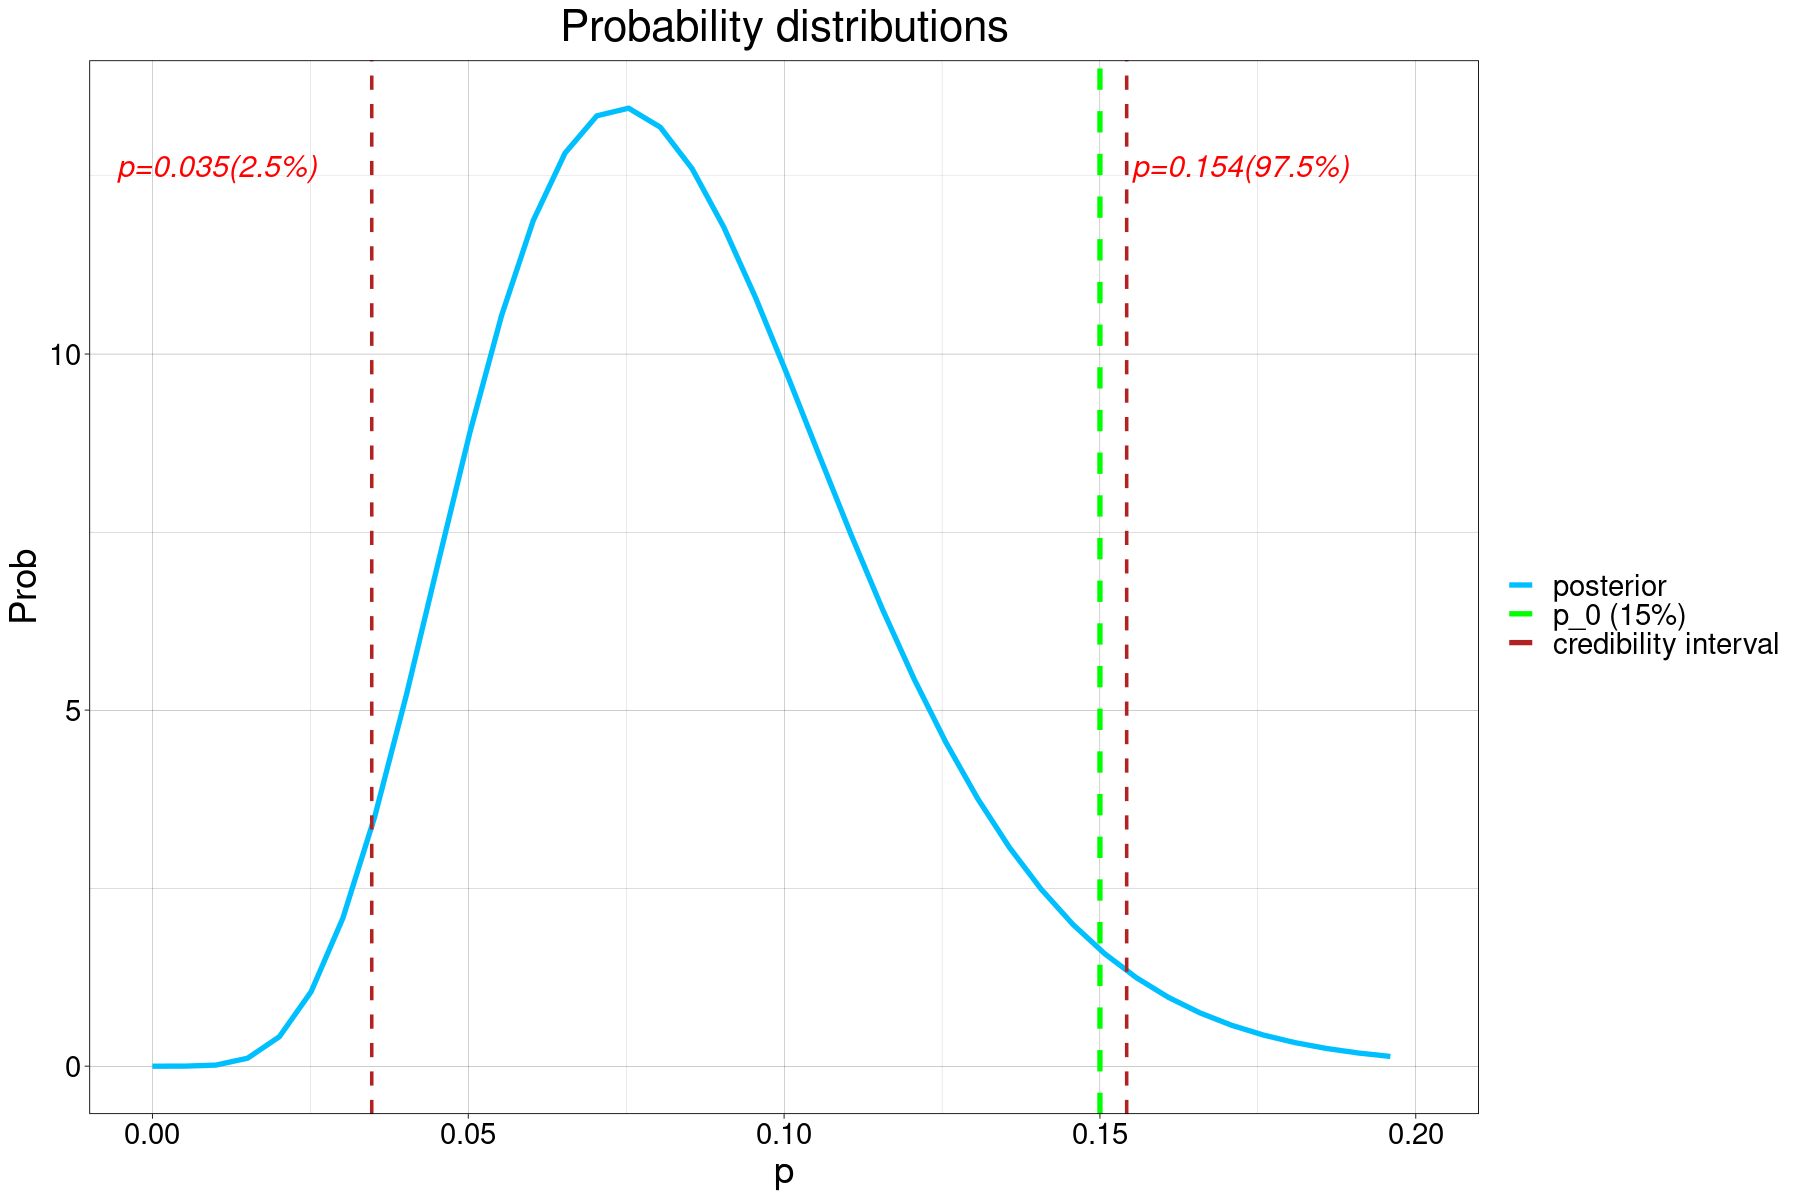

In [199]:
options(repr.plot.width=15, repr.plot.height=10)

plot <- ggplot() +
        geom_line(aes(x=p, y=beta_distr, color="posterior"),lwd=1.5) + 
        geom_vline(xintercept = p_0, linetype="dashed", color="green", lwd=1.5) +
        geom_vline(xintercept = beta_low, linetype="dashed", color="firebrick",lwd=1) +
        geom_vline(xintercept = beta_high, linetype="dashed", color="firebrick", lwd=1) +
        theme_linedraw() +
        xlim(0,0.2)+
        scale_color_manual(name = "", values = c("posterior" = "deepskyblue","p_0 (15%)"="green", "credibility interval" = "firebrick" ))+
        labs(title=glue("Probability distributions"), x="p",y="Prob")+
        theme(text = element_text(size=22), plot.title = element_text( hjust = 0.5))+
        annotation_custom(grobTree(textGrob("p=0.035(2.5%)", x=0.02,  y=0.9, hjust=0,gp=gpar(col="red", fontsize=18, fontface="italic"))))+
        annotation_custom(grobTree(textGrob("p=0.154(97.5%)", x=0.75,  y=0.9, hjust=0,gp=gpar(col="red", fontsize=18, fontface="italic"))))
plot


As we can see the 15% of probabiliti falls in the credibility interval

### Frequentist

Null distribution 

Warning message:
“Removed 45 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


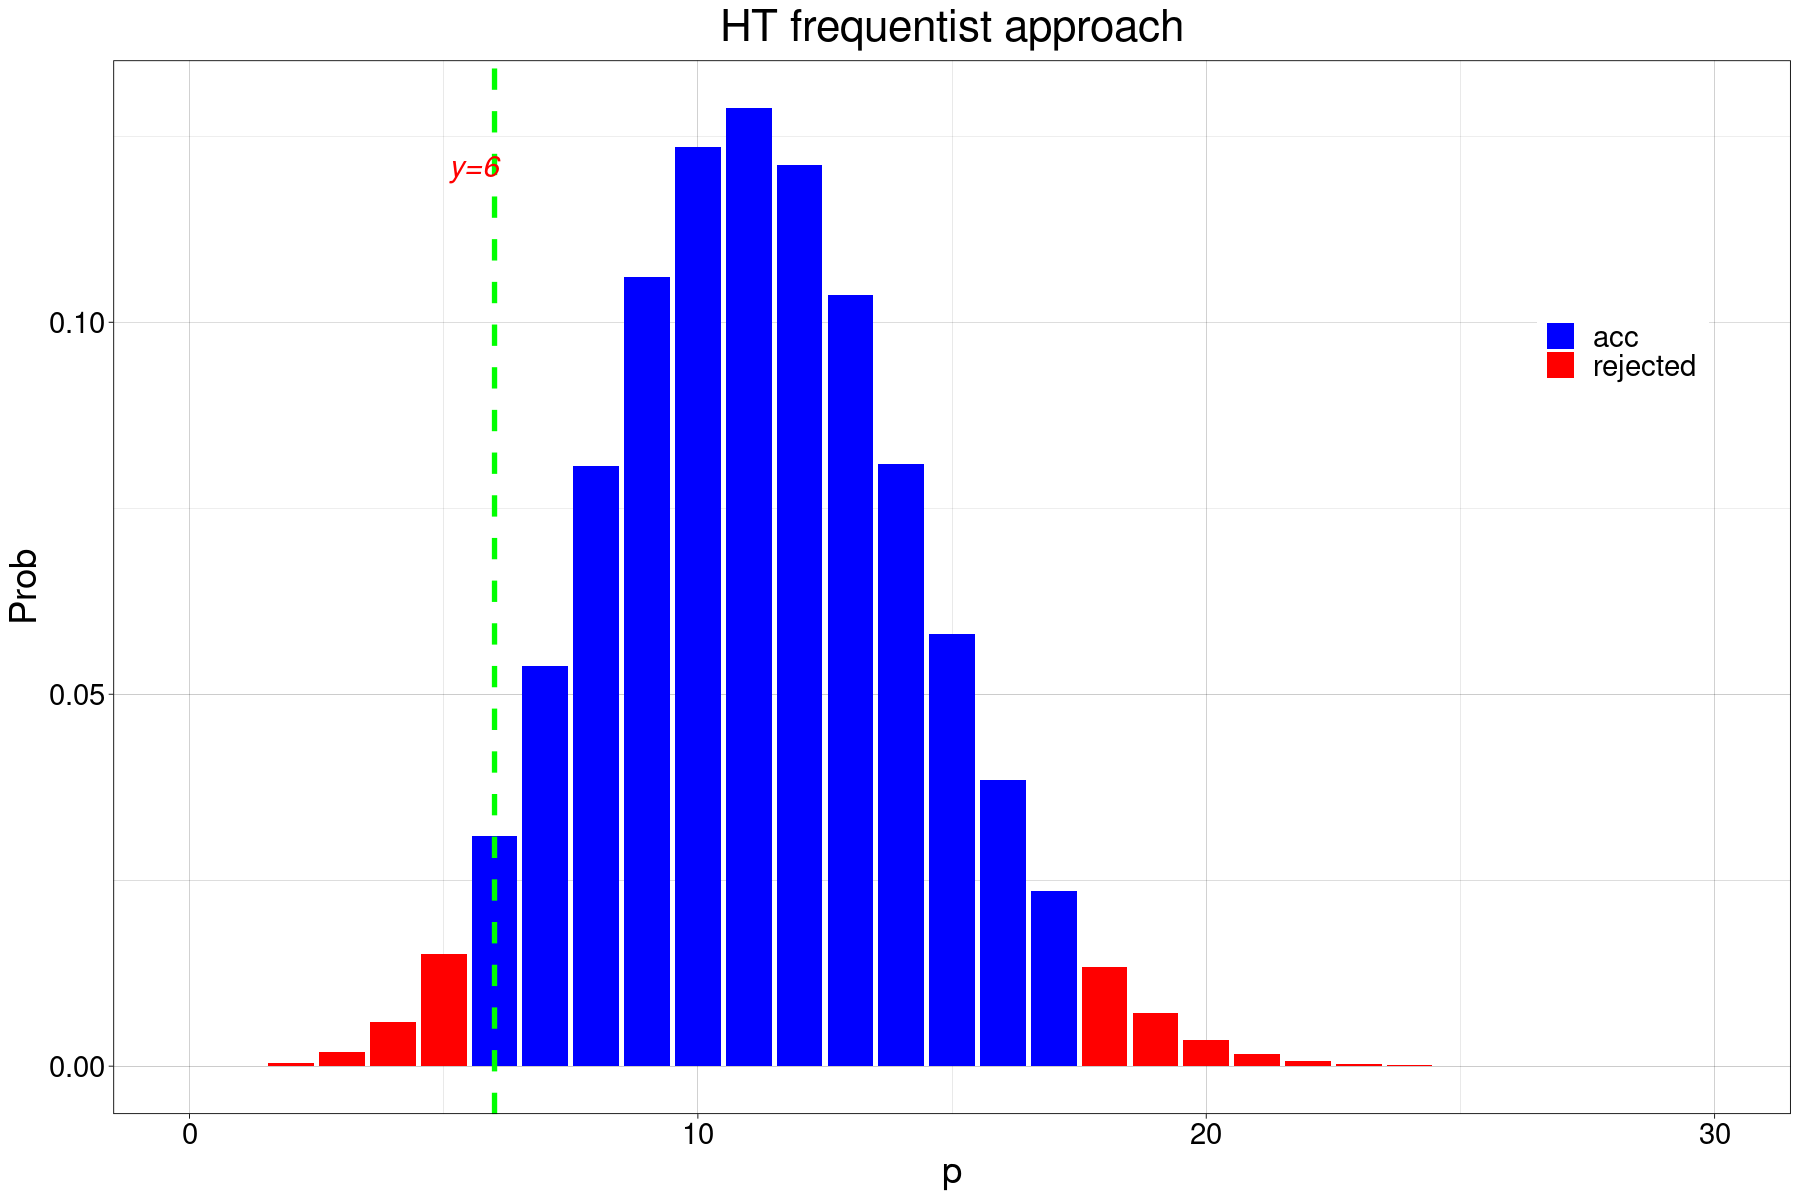

In [286]:
p_value <- 0.05
y_i <- 1:n
p_test <- pbinom(y_i, n, p_0)

y_acc <- y_i[p_test > 0.025 & p_test<0.975]
y_rej_left  <- y_i[p_test < 0.025]
y_rej_right <- y_i[p_test > 0.975]

pp_test <- dbinom(y_i, n, p_0)
col <- c(rep("rejected",length(y_rej_left)),rep("acc",length(y_acc)),rep("rejected",length(y_rej_right)) )

df <- data.frame(y_i, pp_test, col)

options(repr.plot.width=15, repr.plot.height=10)
barp <- ggplot(df, aes(x=y_i, y=pp_test, fill=col)) +
        geom_bar(stat="identity")+
        geom_vline(xintercept = y, linetype="dashed", color="green", lwd=1.5) +
        theme_linedraw() +
        xlim(0,30)+
        scale_fill_manual(name="",values = c("blue","red") )+
        labs(title=glue("HT frequentist approach"), x="p",y="Prob")+
        theme(text = element_text(size=22), plot.title = element_text( hjust = 0.5), 
                legend.position=c(.9,.75))+
        annotation_custom(grobTree(textGrob("y=6", x=0.2,  y=0.9, hjust=0,gp=gpar(col="red", fontsize=18, fontface="italic"))))
barp

conclusione

## Es2

uniform prior is like a gamma distribution Gamma(1,0)/
Jeffres' prior is Gamma(1/2,0)

Posterior is a gamma again but with particular alpha e lambda


In [334]:
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)

alpha_u1 <- sum(n1) + 1
alpha_u2 <- sum(n2) + 1
lambda   <- length(n1)

n_sample <- 100
p <- seq(20,60, length.out=n_sample)
post_u1 <- dgamma(p, alpha_u1,lambda) / (sum(dgamma(p, alpha_u1,lambda) )/n_sample)
post_u2 <- dgamma(p, alpha_u2,lambda) / (sum(dgamma(p, alpha_u2,lambda) )/n_sample)


For the mean and std values we follow the formula for the Gamma distribution. To calulate the median we use the definition

In [298]:
mean_u1 <- alpha_u1/lambda; var_u1 <- alpha_u1/lambda^2 
mean_u2 <- alpha_u2/lambda; var_u2 <- alpha_u2/lambda^2 

median_u1 <- p[length(which( cumsum(post_u1) / n_sample <= 0.5))]
median_u2 <- p[length(which( cumsum(post_u2) / n_sample <= 0.5))]

u1_low  <- qgamma(0.025, alpha_u1, lambda); u1_high <- qgamma(0.975, alpha_u1, lambda)
u2_low  <- qgamma(0.025, alpha_u2, lambda); u2_high <- qgamma(0.975, alpha_u2, lambda)


In [335]:
cat("Uniform prior, first dataset \n")
cat("\t mean=", mean_u1,"\n")
cat("\t var=", var_u1,"\n")
cat("\t meadian=", median_u1,"\n")
cat("\t 95% credibility interval boundary", u1_low,"-", u1_high,"\n")

cat("Uniform prior, second dataset \n")
cat("\t mean=", mean_u2,"\n")
cat("\t var=", var_u2,"\n")
cat("\t meadian=", median_u2,"\n")
cat("\t 95% credibility interval boundary", u2_low,"-", u2_high,"\n")


Uniform prior, first dataset 
	 mean= 33.5 
	 var= 5.583333 
	 meadian= 32.92929 
	 95% credibility interval boundary 29.02861 - 38.287 
Uniform prior, second dataset 
	 mean= 46.83333 
	 var= 7.805556 
	 meadian= 46.26263 
	 95% credibility interval boundary 41.51703 - 52.46527 


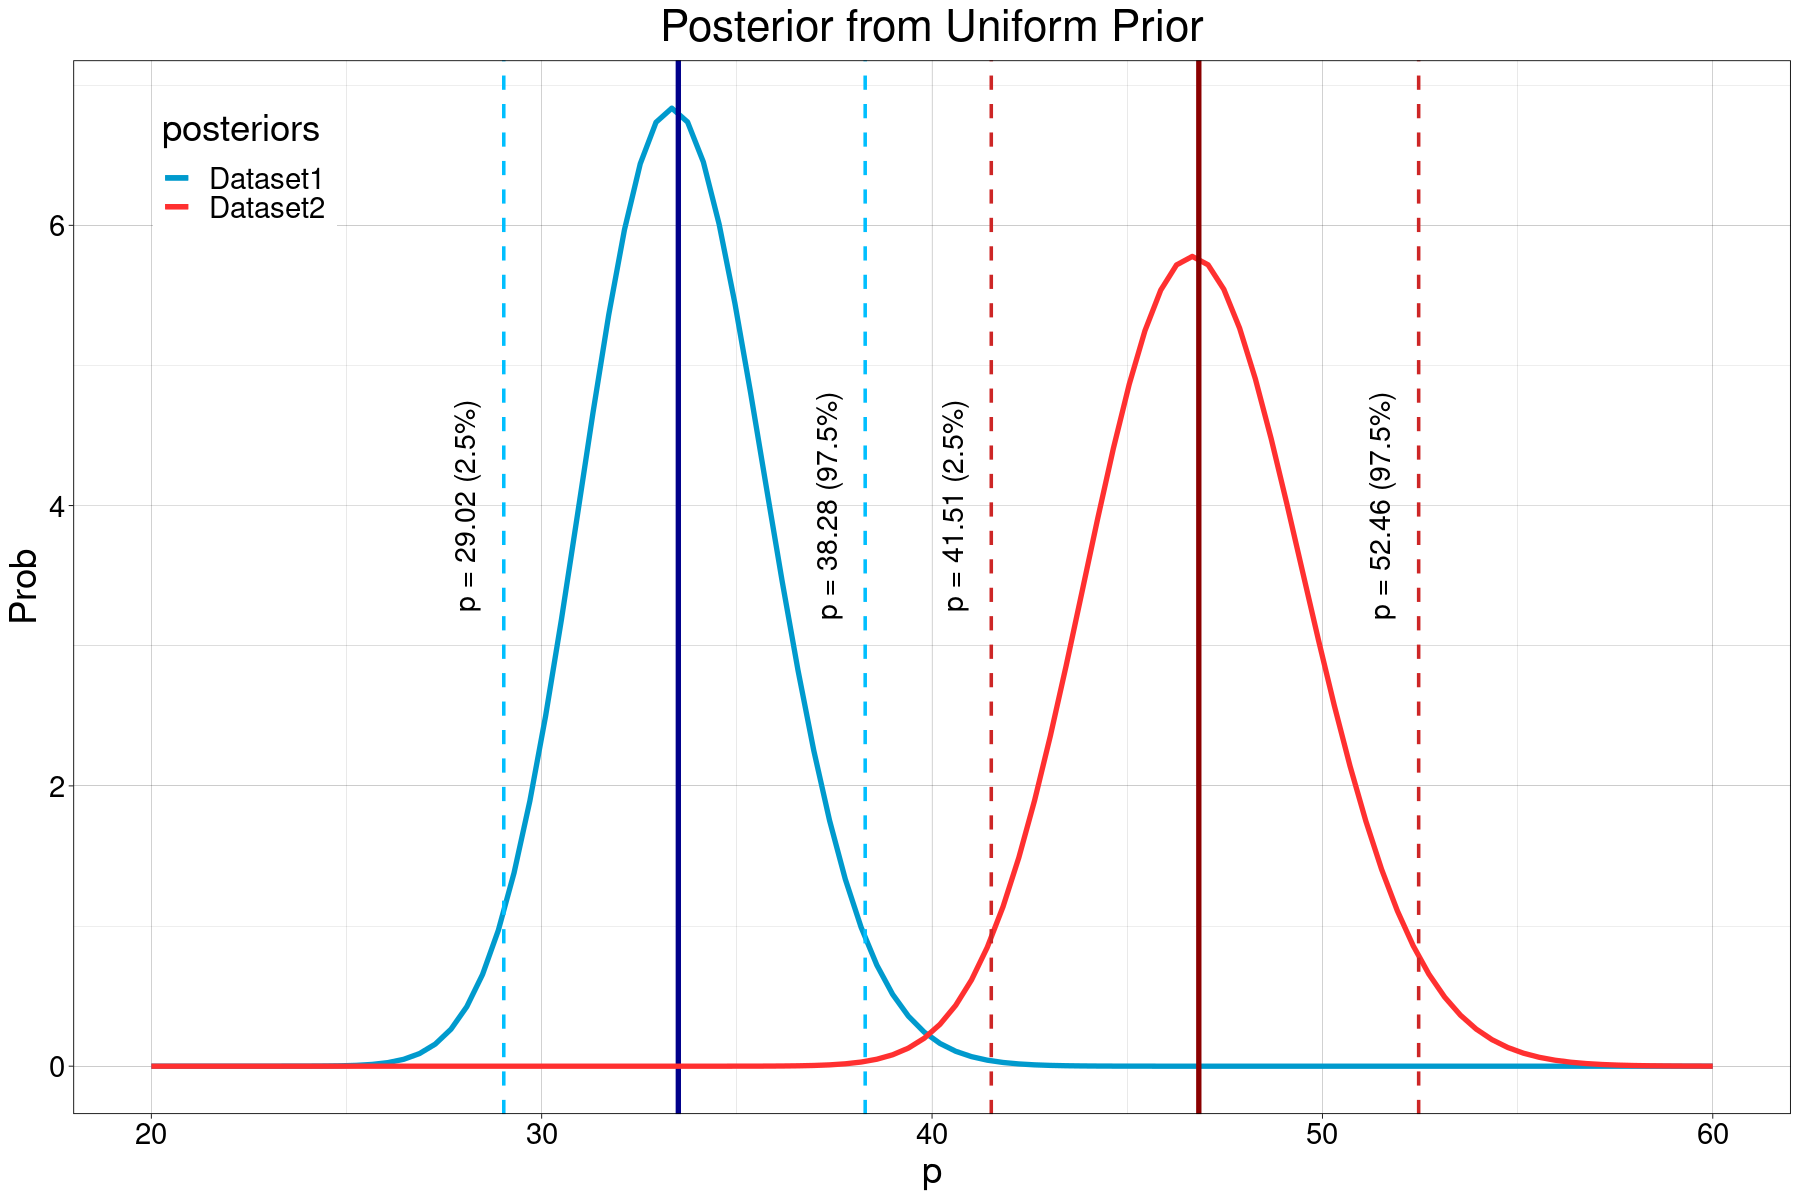

In [344]:
options(repr.plot.width=15, repr.plot.height=10)

plot <- ggplot() +
        geom_line(aes(x=p, y=post_u1, color="Dataset1"),lwd=1.5) + 
        geom_vline(xintercept = mean_u1, color="darkblue", lwd=1.5) +
        geom_vline(xintercept = u1_low,  linetype="dashed", color="deepskyblue1",lwd=1) +
        geom_vline(xintercept = u1_high, linetype="dashed", color="deepskyblue1", lwd=1) +

        geom_line(aes(x=p, y=post_u2, color="Dataset2"),lwd=1.5) + 
        geom_vline(xintercept = mean_u2, color="darkred", lwd=1.5) +
        geom_vline(xintercept = u2_low,  linetype="dashed", color="firebrick3",lwd=1) +
        geom_vline(xintercept = u2_high, linetype="dashed", color="firebrick3", lwd=1) +
        

        annotate("text", x=u1_low-1, y=4, label= "p = 29.02 (2.5%)",angle=90, size=6) + 
        annotate("text", x=u1_high-1, y=4, label= "p = 38.28 (97.5%)",angle=90, size=6) + 
        annotate("text", x=u2_low-1, y=4, label= "p = 41.51 (2.5%)",angle=90, size=6) + 
        annotate("text", x=u2_high-1, y=4, label= "p = 52.46 (97.5%)",angle=90, size=6) + 
        
        scale_color_manual(name = "posteriors", values = c("Dataset1" = "deepskyblue3", "Dataset2"="firebrick1"))+
        theme_linedraw() +
        labs(title=glue("Posterior from Uniform Prior"), x="p",y="Prob")+
        theme(text = element_text(size=22), plot.title = element_text( hjust = 0.5), legend.position=c(.1,.90))

plot


### Jeffries' Prior

In [337]:
alpha_j1 <- sum(n1) + 0.5
alpha_j2 <- sum(n2) + 0.5
lambda   <- length(n1)

post_j1 <- dgamma(p, alpha_j1,lambda) / (sum(dgamma(p, alpha_j1,lambda) )/n_sample)
post_j2 <- dgamma(p, alpha_j2,lambda) / (sum(dgamma(p, alpha_j2,lambda) )/n_sample)

In [338]:
mean_j1 <- alpha_j1/lambda; var_j1 <- alpha_j1/lambda^2 
mean_j2 <- alpha_j2/lambda; var_j2 <- alpha_j2/lambda^2 

median_j1 <- p[length(which( cumsum(post_j1) / n_sample <= 0.5))]
median_j2 <- p[length(which( cumsum(post_j2) / n_sample <= 0.5))]

j1_low  <- qgamma(0.025, alpha_j1, lambda); j1_high <- qgamma(0.975, alpha_j1, lambda)
j2_low  <- qgamma(0.025, alpha_j2, lambda); j2_high <- qgamma(0.975, alpha_j2, lambda)


In [342]:
cat("Jeffires' prior, first dataset \n")
cat("\t mean=", mean_j1,"\n")
cat("\t var=", var_j1,"\n")
cat("\t meadian=", median_j1,"\n")
cat("\t 95% credibility interval boundary", j1_low,"-", j1_high,"\n")

cat("Jeffries' prior, second dataset \n")
cat("\t mean=", mean_j2,"\n")
cat("\t var=", var_j2,"\n")
cat("\t meadian=", median_j2,"\n")
cat("\t 95% credibility interval boundary", j2_low,"-", j2_high,"\n")


Jeffires' prior, first dataset 
	 mean= 33.41667 
	 var= 5.569444 
	 meadian= 32.92929 
	 95% credibility interval boundary 28.95104 - 38.1979 
Jeffries' prior, second dataset 
	 mean= 46.75 
	 var= 7.791667 
	 meadian= 46.26263 
	 95% credibility interval boundary 41.43857 - 52.37706 


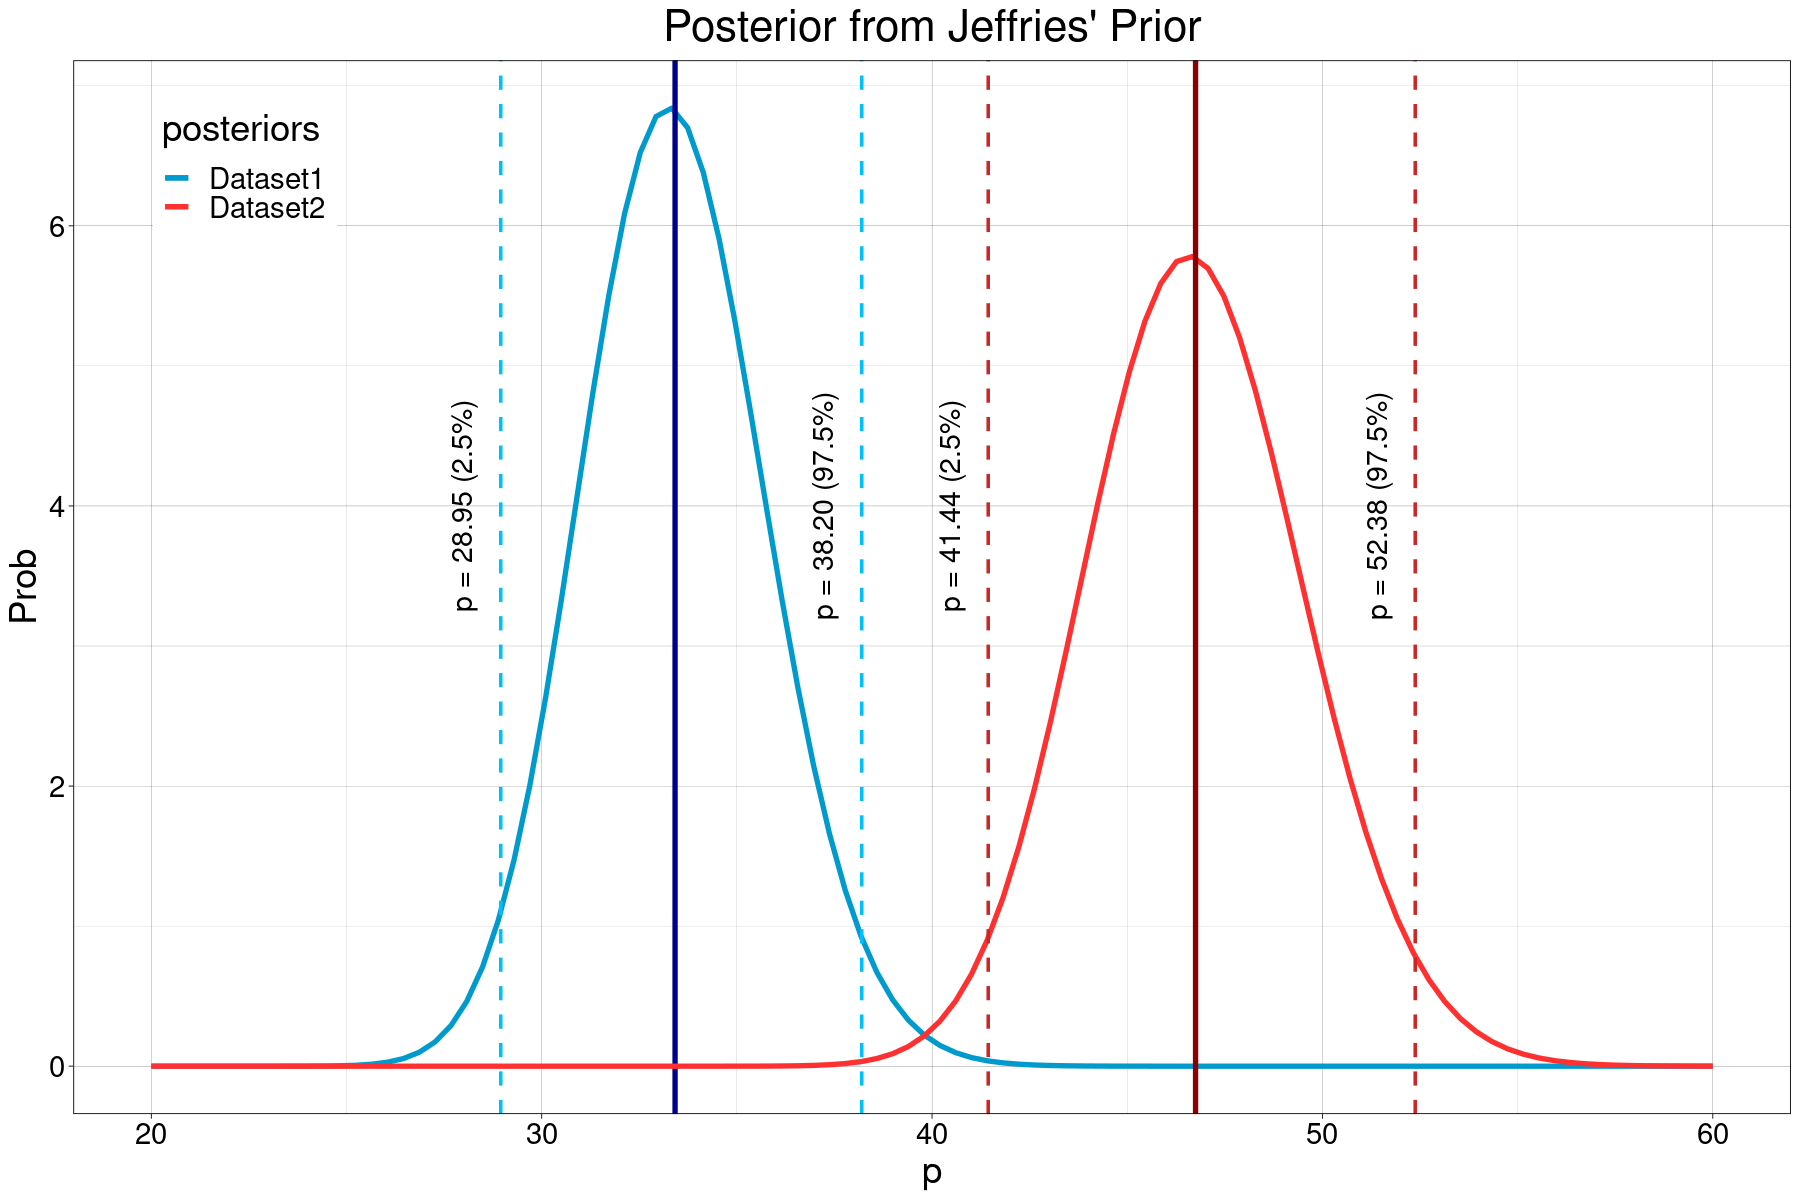

In [343]:
options(repr.plot.width=15, repr.plot.height=10)

plot <- ggplot() +
        geom_line(aes(x=p, y=post_j1, color="Dataset1"),lwd=1.5) + 
        geom_vline(xintercept = mean_j1, color="darkblue", lwd=1.5) +
        geom_vline(xintercept = j1_low,  linetype="dashed", color="deepskyblue1",lwd=1) +
        geom_vline(xintercept = j1_high, linetype="dashed", color="deepskyblue1", lwd=1) +

        geom_line(aes(x=p, y=post_j2, color="Dataset2"),lwd=1.5) + 
        geom_vline(xintercept = mean_j2, color="darkred", lwd=1.5) +
        geom_vline(xintercept = j2_low,  linetype="dashed", color="firebrick3",lwd=1) +
        geom_vline(xintercept = j2_high, linetype="dashed", color="firebrick3", lwd=1) +
        

        annotate("text", x=j1_low-1, y=4, label= "p = 28.95 (2.5%)",angle=90, size=6) + 
        annotate("text", x=j1_high-1, y=4, label= "p = 38.20 (97.5%)",angle=90, size=6) + 
        annotate("text", x=j2_low-1, y=4, label= "p = 41.44 (2.5%)",angle=90, size=6) + 
        annotate("text", x=j2_high-1, y=4, label= "p = 52.38 (97.5%)",angle=90, size=6) + 
        
        scale_color_manual(name = "posteriors", values = c("Dataset1" = "deepskyblue3", "Dataset2"="firebrick1"))+
        theme_linedraw() +
        labs(title=glue("Posterior from Jeffries' Prior"), x="p",y="Prob")+
        theme(text = element_text(size=22), plot.title = element_text( hjust = 0.5), legend.position=c(.1,.90))

plot
